Задание:
- Необходимо произвести предобработку данных,
- обучить модели на алгоритмах, рассмотренных в уроках,
    (были рассмотрены: KNeighborsClassifier, LogisticRegression, GaussianNB, SVC)
- оценить модели с помощью рассмотренных метрик и объяснить выбор определенной метрики.
    (были рассмотрены: Accuracy, Precision, Recall, F1 score, ROC-AUC)

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve, auc,
                             classification_report)
from sklearn.model_selection import train_test_split

In [256]:
df = pd.read_csv('./data/titanic_train.csv')

## Предобработка данных

In [257]:
# для начала посмотрим на набор данных
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [258]:
# сразу видно, что PassengerId дублирует идентификатор строки, и не несет никакой информации о пассажире, поэтому удаляем
df.drop(['PassengerId'], axis=1, inplace=True)

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Survived
 - целевой признак, только конвертируем его в более короткий тип данных

In [260]:
df['Survived'] = df['Survived'].astype(np.int8)

### Pclass

<AxesSubplot:>

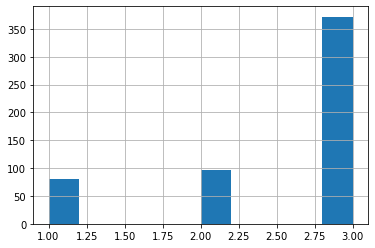

In [261]:
# тоже сконвертируем в int8 т.к. всего 3 возможных значения
df['Pclass'] = df['Pclass'].astype(np.int8)
# посмотрим, влияет ли класс на вероятность не спасения
df[df['Survived'] == 0]['Pclass'].hist()

видно, что чем выше класс, тем больше вероятность спасения

### Name
Было бы странно предположить, что имя влияет на вероятность спасения, но в этом поле есть информация о семейном положении женщин - это префиксы Mrs.: замужем, Miss: нет 

In [262]:
# def get_married_status(param):
#     if param[0] == 'female':
#         if param[1].find('Mrs.') != -1:
#             return 1
#         else:
#             return 0
#     else:
#         return 0 # мужчины все будут холостыми

# #df['mar_status'] = df[['Sex','Name']].apply(get_married_status)
# df['mar_status'] = df[['Sex','Name']].apply(get_married_status)

In [263]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [264]:
# Name больше не нужен
df.drop(['Name'], axis=1, inplace=True)

### Sex
сконвертируем строковый тип данных в числовой

In [265]:
def get_sex_as_int(s: str):
    if s == 'male':
        return 1
    else:
        return 0

df['Sex'] = df['Sex'].apply(get_sex_as_int)

In [266]:
df['Sex'] = df['Sex'].astype(np.int8)

### Ticket
в номерах билетов не просматривается какой либо логики и связи с целевой переменной, поэтому удаляем

In [267]:
df.drop(['Ticket'], axis=1, inplace=True)

### Cabin
Из данных видно, что некорорые пассежиры занимали несколько кабин. Создадим для этой переменной отдельный признак

In [268]:
def cabin_count(s):
    l = s.split(' ')
    return len(l)

df['cabin_count'] = df[df['Cabin'].notna()]['Cabin'].apply(cabin_count)

In [269]:
# заполним пропущенные значения наиболее частыми
df.cabin_count.fillna(df.cabin_count.mode()[0], inplace = True)

In [270]:
df.drop(['Cabin'], axis=1, inplace=True)

### Embarked
Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown. People who boarded from Cherbourg had a higher chance of survival than people who boarded from Southampton or Queenstown.

In [271]:
df['Embarked'] = df['Embarked'].astype('category')

In [272]:
def get_emb_factor(s):
    if s == 'C':
        return 2
    elif s == 'Q':
        return 1
    elif s == 'S':
        return 0
    else:
        return None

df['emb_factor'] = df['Embarked'].apply(cabin_count)
df.drop(['Embarked'], axis=1, inplace=True)

In [273]:
#заполним пропущенные значения наиболее частыми
df.emb_factor.fillna(df.emb_factor.mode()[0], inplace = True)

In [274]:
# заполним пропущенные значения Age средним

df.Age.fillna(round(df['Age'].mean()), inplace = True)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int8   
 1   Pclass       891 non-null    int8   
 2   Sex          891 non-null    int8   
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   cabin_count  891 non-null    float64
 8   emb_factor   891 non-null    float64
dtypes: float64(4), int64(2), int8(3)
memory usage: 44.5 KB


## обучить модели на алгоритмах, рассмотренных в уроках,
    KNeighborsClassifier, LogisticRegression, GaussianNB, SVC

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay

models = []
accuracy_scr = []
precision_scr = []
recall_scr = []
f1_scr = []
roc_auc = []

def try_model(model, X_train, y_train, X_test, y_test, model_params=None):
    if model_params is None:
        model_params = dict()
    #print(model.__name__)

    models.append(model.__name__)

    pipeline = make_pipeline(StandardScaler(), model(**model_params))
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    # print('Accuracy:', accuracy_score(y_test, y_pred))
    # print('Precision:', precision_score(y_test, y_pred))
    # print('Recall:', recall_score(y_test, y_pred))
    # print('F1 score:', f1_score(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
    #plt.plot(fpr, tpr, color="darkorange", label=f"ROC curve (area = {auc(fpr, tpr):0.3f})")
    #plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
    #plt.legend()

    accuracy_scr.append(accuracy_score(y_test, y_pred))
    precision_scr.append(precision_score(y_test, y_pred))
    recall_scr.append(recall_score(y_test, y_pred))
    f1_scr.append(f1_score(y_test, y_pred))
    roc_auc.append(auc(fpr, tpr))

    #return pipeline

In [277]:
# делим выборку на обучающую и тестовую
X = df.iloc[:, 1:]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=13)

In [278]:
try_model(LogisticRegression, X_train, y_train, X_test, y_test)

In [279]:
try_model(GaussianNB, X_train, y_train, X_test, y_test)

In [280]:
#подберем наилучшее количество соседей для KNN
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": list(range(1, 16))}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters)
clf.fit(X_train, y_train) 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15]})

In [281]:
# пробуем модель с лучшим пораметром
try_model(KNeighborsClassifier, X_train, y_train, X_test, y_test,
            model_params=dict(
            n_neighbors=clf.best_params_["n_neighbors"]
))

In [282]:
try_model(SVC, X_train, y_train, X_test, y_test,
          model_params=dict(
            kernel='linear',
            probability=True,
))

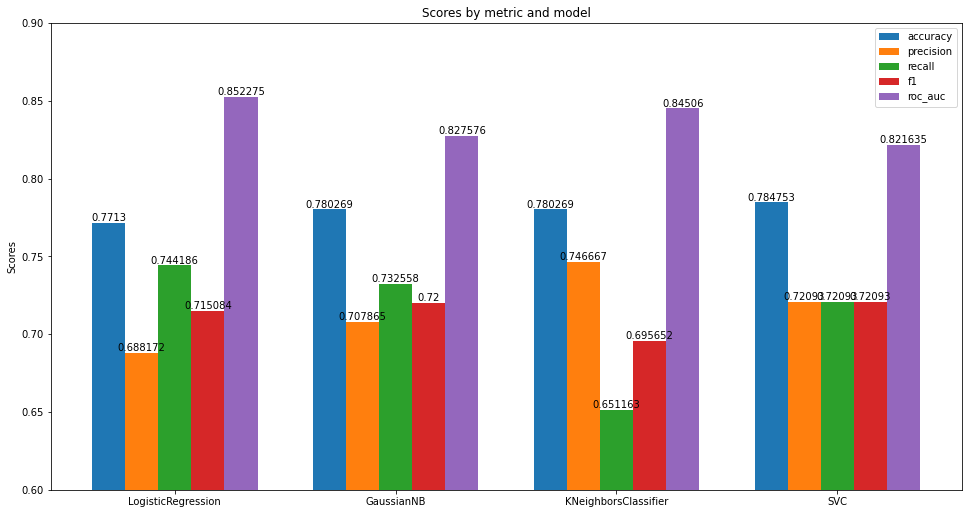

In [283]:
# выведем показатели точности разных моделей на одном графике для сравнения
x = np.arange(len(models))  # the label locations
width = 0.15 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 2*width, accuracy_scr, width, label='accuracy')
rects2 = ax.bar(x - width, precision_scr, width, label='precision')
rects3 = ax.bar(x, recall_scr, width, label='recall')
rects4 = ax.bar(x + width, f1_scr, width, label='f1')
rects5 = ax.bar(x + 2*width, roc_auc, width, label='roc_auc')

ax.set_ylim(0.6, 0.9)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by metric and model')
ax.set_xticks(x, models)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)
ax.bar_label(rects4)
ax.bar_label(rects5)
fig.tight_layout()

fig.set_size_inches(15, 8)
plt.show()


Выбор конкретной метрики для выбора наилучшей модели должен определяться задачей исследования. Например, если бы нужно было точно определить тех пассажиров, кто точно спасется, то precision был бы правильным выбором, и тогда наиболее подходящим алгоритмом был KNN с лучшим показателем точности. Но в задании ничего не сказано о приоритетах исследования, поэтому, думаю, будет правильным ориентироваться на f1 как на более универсальный показатель. По нему наиболее удачными моделями являются GaussianNB (0.72) и SVC (0.721)